<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Représentation-vectorielle" data-toc-modified-id="Représentation-vectorielle-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Représentation vectorielle</a></span></li><li><span><a href="#No-match" data-toc-modified-id="No-match-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>No match</a></span></li><li><span><a href="#Matching" data-toc-modified-id="Matching-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Matching</a></span></li><li><span><a href="#Mapping" data-toc-modified-id="Mapping-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Mapping</a></span></li></ul></div>

In [104]:
from gensim.models.keyedvectors import KeyedVectors
import numpy as np
plt.rcParams["figure.figsize"] = (20,10)
from sklearn.manifold import TSNE

word_vectors = KeyedVectors.load_word2vec_format(\
    '/Users/mc/Downloads/GoogleNews-vectors-negative300.bin', \
    binary = True, limit = 1000000)

## Représentation vectorielle

In [7]:
word_vectors['dog'].shape

(300,)

In [8]:
word_vectors.most_similar(positive = ['nice'], topn = 5)

[('good', 0.6836091876029968),
 ('lovely', 0.6676310896873474),
 ('neat', 0.6616737246513367),
 ('fantastic', 0.6569241881370544),
 ('wonderful', 0.6561347246170044)]

In [9]:
word_vectors.most_similar(positive = ['dog'], topn = 5)

[('dogs', 0.8680489659309387),
 ('puppy', 0.8106428384780884),
 ('pit_bull', 0.7803961038589478),
 ('pooch', 0.7627376914024353),
 ('cat', 0.7609457969665527)]

## No match

In [15]:
word_vectors.doesnt_match(
['Hitler', 'Churchill', 'Stalin', 'Beethoven'])

'Beethoven'

In [ ]:
word_vectors.doesnt_match(
['Hitler', 'Churchill', 'Stalin', 'Beethoven', 'cat'])

## Matching

In [21]:
word_vectors.most_similar(
positive = ['father', 'woman'], negative = ['man'], topn = 1)

[('mother', 0.8462507128715515)]

In [25]:
word_vectors.most_similar(
positive = ['doctor', 'woman'], negative = ['man'], topn = 1)

[('gynecologist', 0.7093892097473145)]

In [26]:
word_vectors.most_similar(
positive = ['success', 'woman'], negative = ['man'], topn = 1)

[('successes', 0.6008042097091675)]

In [63]:
import re
import codecs


def preprocess_text(text):
    text = re.sub('[^a-zA-Zа-яА-Я1-9]+', ' ', text)
    text = re.sub(' +', ' ', text)
    return text.strip()


def prepare_for_w2v(filename_from, filename_to, lang):
    raw_text = codecs.open(filename_from, "r", encoding='windows-1251').read()
    with open(filename_to, 'w', encoding='utf-8') as f:
        for sentence in nltk.sent_tokenize(raw_text, lang):
            print(preprocess_text(sentence.lower()), file=f)

In [88]:
import multiprocessing
from gensim.models import Word2Vec


def train_word2vec(filename):
    data = gensim.models.word2vec.LineSentence(filename)
    return Word2Vec(data, window=5, min_count=5, workers=multiprocessing.cpu_count())


In [86]:
keys = ['Paris', 'Python', 'Sunday', 'Tolstoy', 'Twitter', 'bachelor', 'delivery', 'election', 'expensive',
        'experience', 'financial', 'food', 'iOS', 'peace', 'release', 'war']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in word_vectors.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(word_vectors[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [87]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

/opt/homebrew/Caskroom/miniforge/base/envs/tf-conda-hugging/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tf-conda-hugging/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

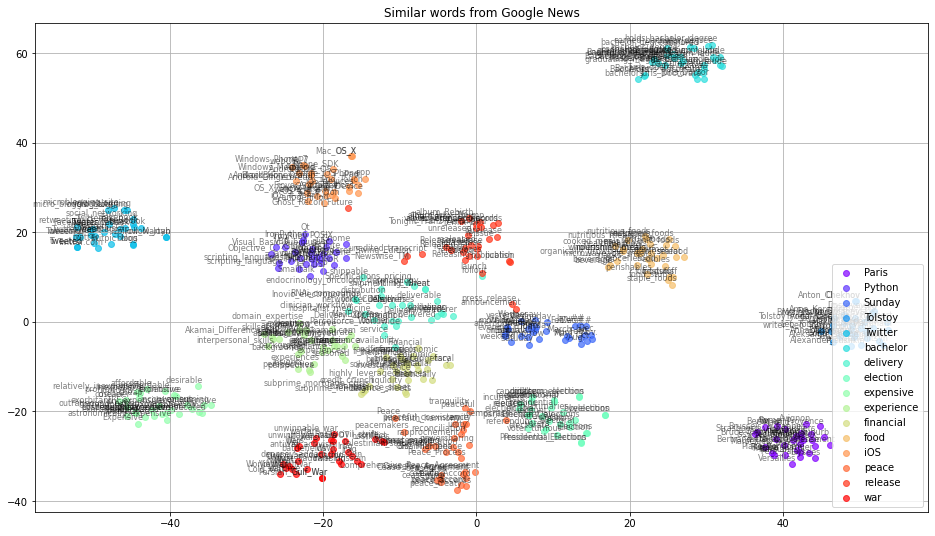

In [84]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from Google News', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

In [80]:
import nltk 
import gensim

/opt/homebrew/Caskroom/miniforge/base/envs/tf-conda-hugging/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tf-conda-hugging/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


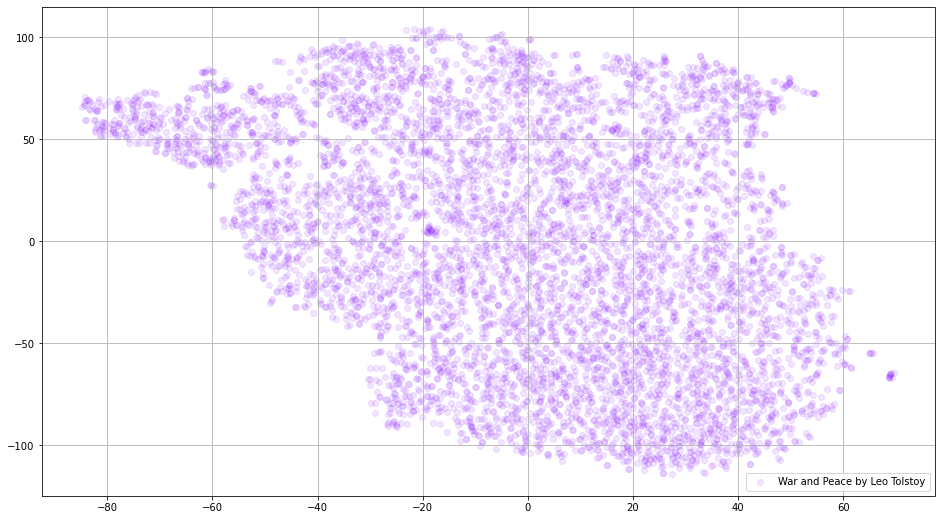

In [103]:
prepare_for_w2v('/Users/mc/Downloads/book-war-and-peace.txt', 'war-and-peace.txt', 'english')
model_ak = train_word2vec('war-and-peace.txt')

words_ak = []
embeddings_ak = []
for word in list(model_ak.wv.index_to_key):
    embeddings_ak.append(model_ak.wv[word])
    words_ak.append(word)
    
tsne_ak_2d = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_ak_2d = tsne_ak_2d.fit_transform(embeddings_ak)

def tsne_plot_2d(label, embeddings, words=[], a=1):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, 1))
    x = embeddings[:,0]
    y = embeddings[:,1]
    plt.scatter(x, y, c=colors, alpha=a, label=label)
    for i, word in enumerate(words):
        plt.annotate(word, alpha=0.3, xy=(x[i], y[i]), xytext=(5, 2), 
                     textcoords='offset points', ha='right', va='bottom', size=10)
    plt.legend(loc=4)
    plt.grid(True)
    plt.savefig("hhh.png", format='png', dpi=150, bbox_inches='tight')
    plt.show()

tsne_plot_2d('War and Peace by Leo Tolstoy', embeddings_ak_2d, a=0.1)